# Columns Details
survival - Survival (0 = No; 1 = Yes),
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd),
name - Name,
sex - Sex,
age - Age,
sibsp - Number of Siblings/Spouses Aboard,
parch - Number of Parents/Children Aboard,
ticket - Ticket Number,
fare - Passenger Fare,
cabin - Cabin,
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [130]:
# Importing  the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [131]:
# IMporting the Data
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis
Let's begin some expolartory data analysis! We will start by checking out missing data!

 # Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!



<Axes: >

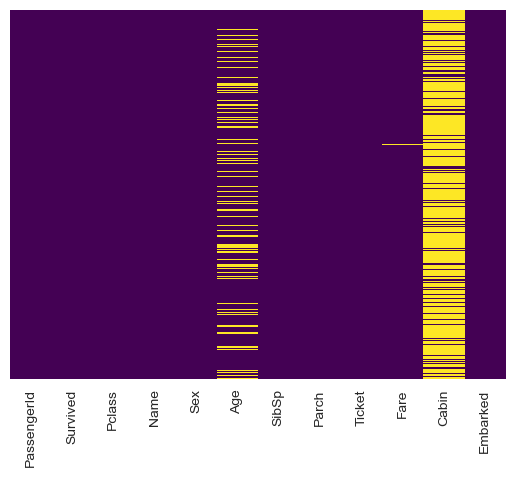

In [133]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


# Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

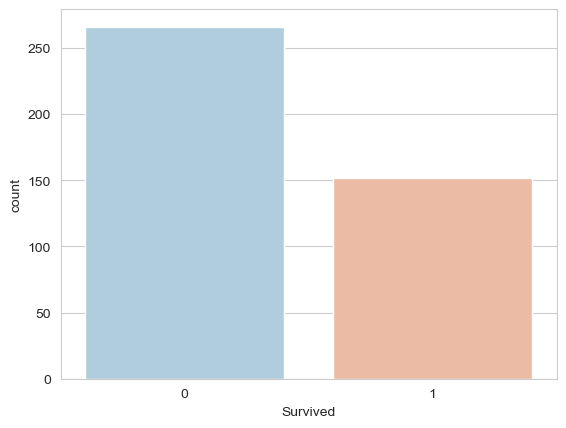

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df, palette='RdBu_r')
             

<Axes: xlabel='Survived', ylabel='count'>

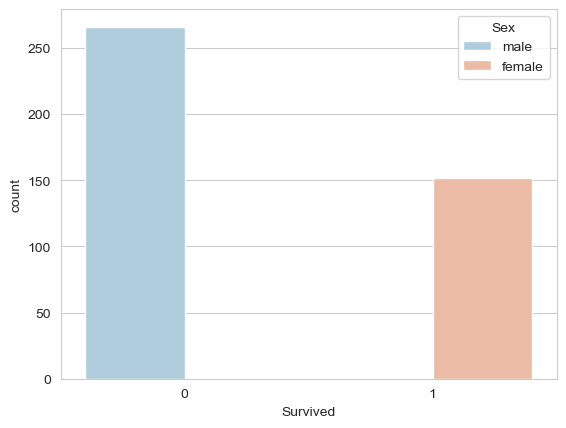

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

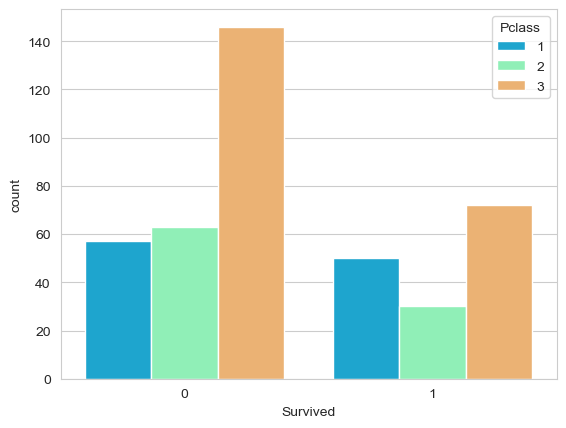

In [136]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_16412\536382733.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

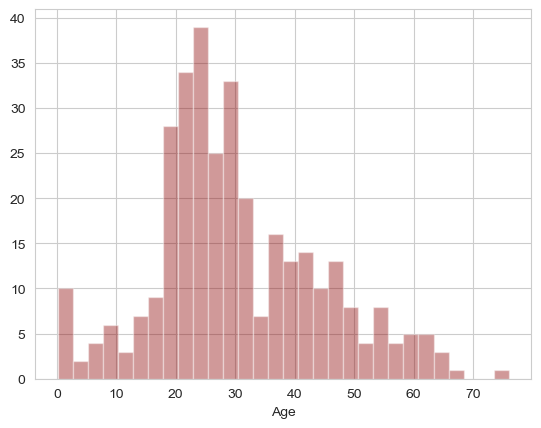

In [137]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred', bins=30)

<Axes: >

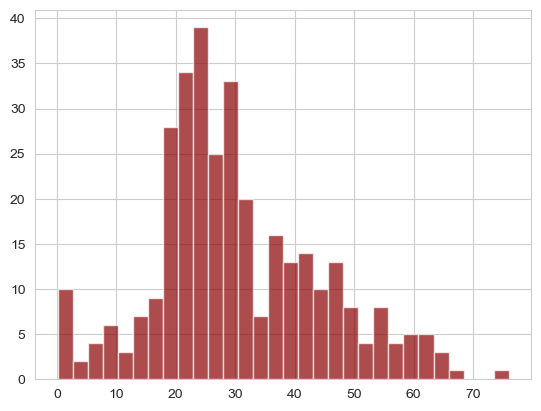

In [138]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

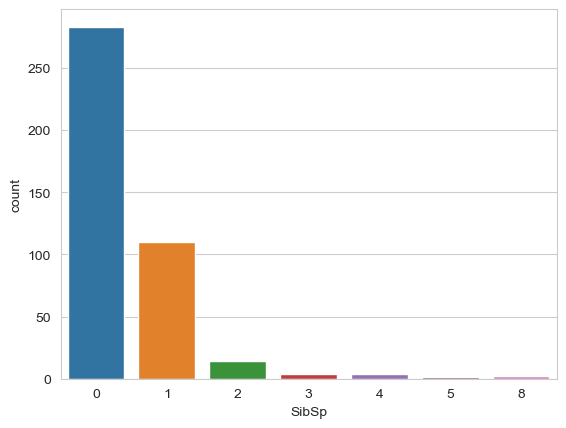

In [139]:
sns.countplot(x='SibSp',data=df)

<Axes: xlabel='Parch', ylabel='count'>

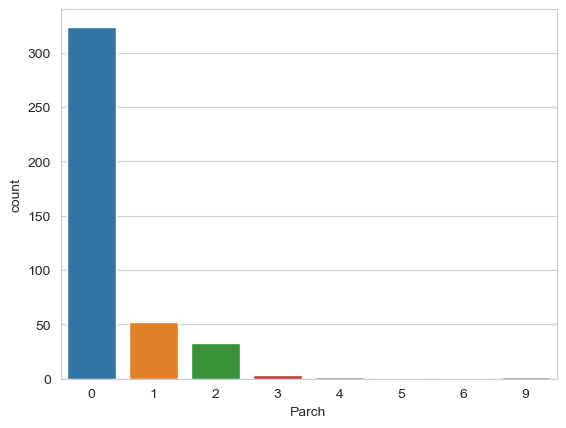

In [140]:
sns.countplot(x='Parch',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

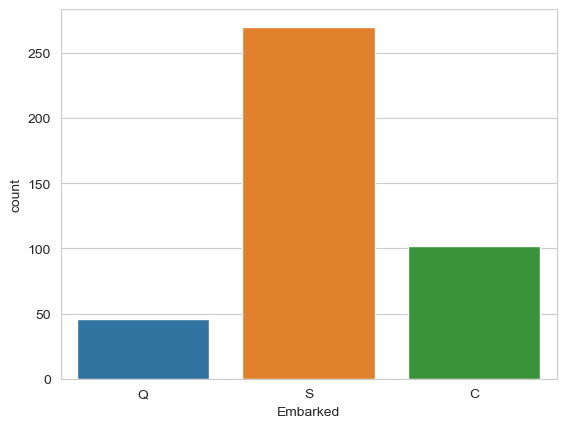

In [141]:
sns.countplot(x='Embarked',data=df)

<Axes: >

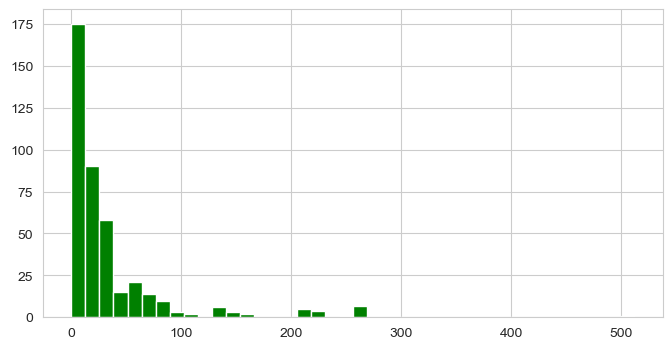

In [142]:
df['Fare'].hist(color='green', bins=40,figsize=(8,4))

In [143]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

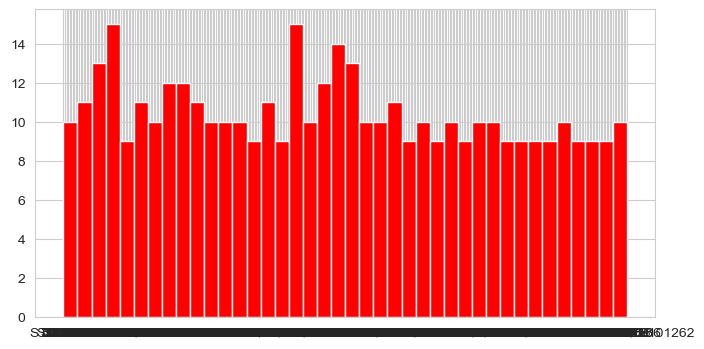

In [144]:
df['Ticket'].hist(color='r', bins=40, figsize=(8,4))

# Cufflinks for plots

In [145]:
import cufflinks as cf
cf.go_offline()

In [146]:
df['Fare'].iplot(kind='hist',bins=30,color='green')



# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

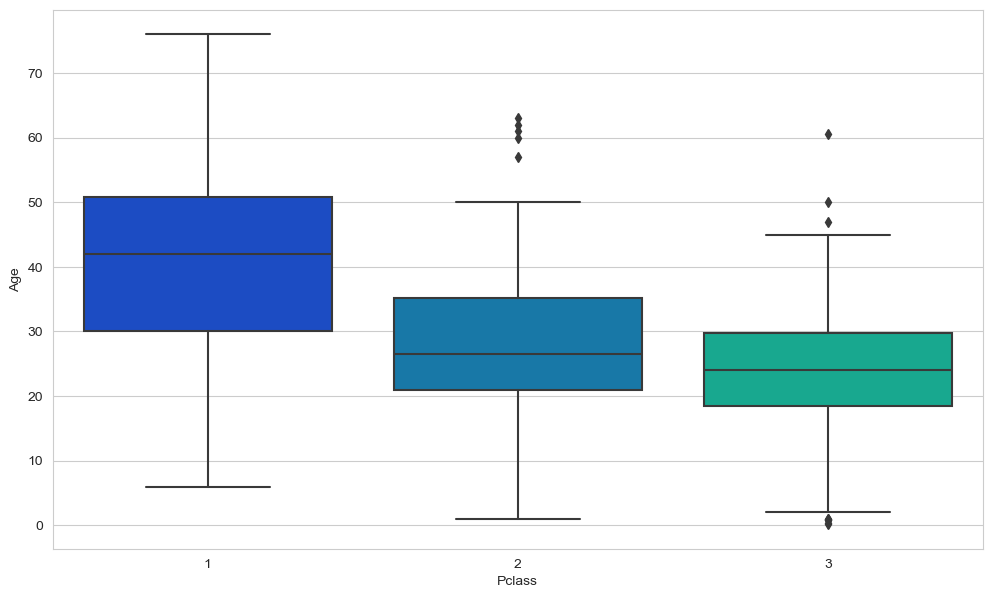

In [147]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=df, palette='winter')

In [148]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    

In [149]:
df['Age']=df[['Age','Pclass']].apply(impute_age, axis=1)

In [150]:
df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [151]:
df['Age'].isnull().sum()

0

<Axes: >

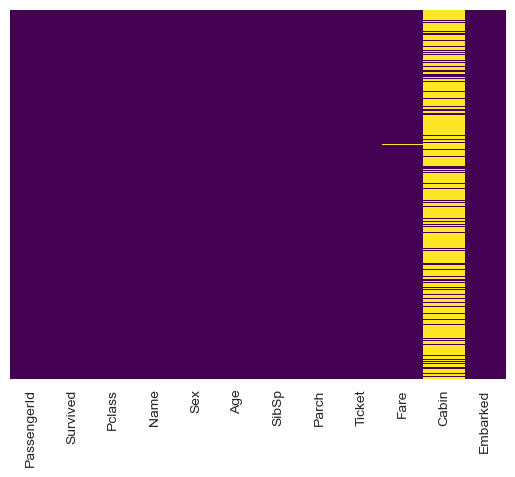

In [152]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [153]:
df.drop('Cabin',axis=1, inplace=True)

In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [155]:
df.dropna(inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [157]:
# Make Dummies Variable
sex=pd.get_dummies(df['Sex'],drop_first=True)
Embark=pd.get_dummies(df['Embarked'], drop_first= True)

In [158]:
sex

,male
0,True
1,False
2,True
3,True
4,False
...,...
413,True
414,False
415,True
416,True


In [159]:
Embark

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
413,False,True
414,False,False
415,False,True
416,False,True


In [160]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [161]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [162]:
df=pd.concat([df,sex,Embark],axis=1)

In [163]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [164]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

# Performing Logistic Regression
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).




In [165]:
X=df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S']]

In [166]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,True,False,True
414,1306,1,39.0,0,0,108.9000,False,False,False
415,1307,3,38.5,0,0,7.2500,True,False,True
416,1308,3,24.0,0,0,8.0500,True,False,True


In [167]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [170]:
y=df[['Survived']]

In [171]:
y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [173]:
X_train.shape

(291, 9)

In [174]:
X_test.shape

(126, 9)

In [175]:
y_train.shape

(291, 1)

In [176]:
X_train.shape

(291, 9)

In [177]:
y_test.shape

(126, 1)

In [179]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [180]:
y_pred=logmodel.predict(X_test)

In [181]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [183]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        65\n           1       1.00      1.00      1.00        61\n\n    accuracy                           1.00       126\n   macro avg       1.00      1.00      1.00       126\nweighted avg       1.00      1.00      1.00       126\n'